In [1]:
!nvidia-smi

Wed Aug 14 12:19:02 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    16W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd /content/drive/My Drive/code

/content/drive/My Drive/code


In [0]:
cp kaggle_dogcat.zip /content

In [5]:
cd /content

/content


In [6]:
ls

drive/  kaggle_dogcat.zip  sample_data/


In [7]:
!unzip kaggle_dogcat.zip

Archive:  kaggle_dogcat.zip
   creating: kaggle_dogcat/
  inflating: kaggle_dogcat/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/kaggle_dogcat/
  inflating: __MACOSX/kaggle_dogcat/._.DS_Store  
   creating: kaggle_dogcat/test/
  inflating: kaggle_dogcat/test/189.jpg  
   creating: __MACOSX/kaggle_dogcat/test/
  inflating: __MACOSX/kaggle_dogcat/test/._189.jpg  
  inflating: kaggle_dogcat/test/162.jpg  
  inflating: __MACOSX/kaggle_dogcat/test/._162.jpg  
  inflating: kaggle_dogcat/test/176.jpg  
  inflating: __MACOSX/kaggle_dogcat/test/._176.jpg  
  inflating: kaggle_dogcat/test/348.jpg  
  inflating: __MACOSX/kaggle_dogcat/test/._348.jpg  
  inflating: kaggle_dogcat/test/360.jpg  
  inflating: __MACOSX/kaggle_dogcat/test/._360.jpg  
  inflating: kaggle_dogcat/test/374.jpg  
  inflating: __MACOSX/kaggle_dogcat/test/._374.jpg  
  inflating: kaggle_dogcat/test/228.jpg  
  inflating: __MACOSX/kaggle_dogcat/test/._228.jpg  
  inflating: kaggle_dogcat/test/214.jpg  
  inflating: 

In [8]:
ls

drive/  kaggle_dogcat/  kaggle_dogcat.zip  __MACOSX/  sample_data/


In [9]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
print(os.listdir("./kaggle_dogcat"))

Using TensorFlow backend.


['.DS_Store', 'train', 'test']


In [0]:
# Define Constants
FAST_RUN = False
IMAGE_WIDTH=150
IMAGE_HEIGHT=150
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3


In [0]:
# Prepare Training Data
filenames = os.listdir('./kaggle_dogcat/train')
categories = []
for filename in filenames:
  category = filename.split('_')[0]
  if category == 'cat':
    categories.append(1)
  else:
    categories.append(0)
    
df = pd.DataFrame({
    'filename' : filenames,
    'category' : categories
})
    
    

In [12]:
df.head()

,filename,category
0,cat_910.jpg,1
1,cat_1620.jpg,1
2,dog_1069.jpg,0
3,cat_1409.jpg,1
4,dog_1672.jpg,0


In [13]:
df.tail(10)

,filename,category
3991,cat_1678.jpg,1
3992,cat_1120.jpg,1
3993,cat_817.jpg,1
3994,dog_47.jpg,0
3995,cat_1304.jpg,1
3996,dog_3.jpg,0
3997,cat_293.jpg,1
3998,cat_793.jpg,1
3999,cat_986.jpg,1
4000,cat_737.jpg,1


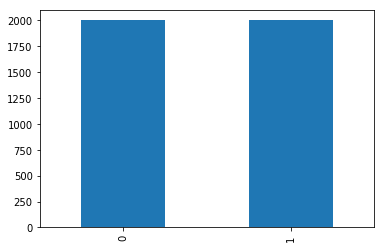

In [14]:
# See Total count
df['category'].value_counts().plot.bar()

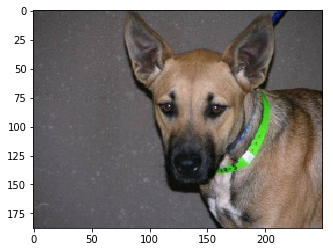

In [15]:
# See sample Image
sample = random.choice(filenames)
image = load_img('./kaggle_dogcat/train/' + sample)
plt.imshow(image)

In [0]:


# # Build model
# from keras import layers
# from keras import models

# model = models.Sequential()
# model.add(layers.Conv2D(32, (3,3), activation = 'relu',
#                        input_shape = (150, 150, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Flatten())
# model.add(layers.Dense(512, activation = 'relu'))
# model.add(layers.Dense(1, activation = 'sigmoid'))
# model.summary()

# # Configuring the model for training
# from keras import optimizers
# model.compile(loss = 'binary_crossentropy',
#                     optimizer = optimizers.RMSprop(lr = 1e-4),
#                     metrics = ['acc'])

In [17]:
# Build model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

W0814 12:20:24.063397 139870186358656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0814 12:20:24.106623 139870186358656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0814 12:20:24.113891 139870186358656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0814 12:20:24.151423 139870186358656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0814 12:20:24.152386 1398701863

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
__________

## Prepare data
Because we will use image genaretor with class_mode="categorical". We need to convert column category into string. Then imagenerator will convert it one-hot encoding which is good for our classification.

So we will convert 1 to dog and 0 to cat

In [0]:
df["category"] = df["category"].replace({1: 'cat', 0: 'dog'}) 

In [0]:
train_df, validate_df  = train_test_split(df, test_size = 0.20, random_state = 42)
train_df = train_df.reset_index(drop = True)
validate_df = validate_df.reset_index(drop = True)

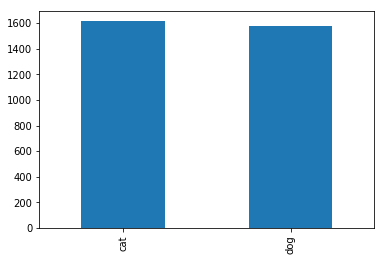

In [20]:
train_df['category'].value_counts().plot.bar()


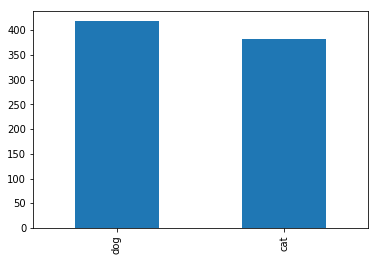

In [21]:
validate_df['category'].value_counts().plot.bar()

In [0]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [23]:
total_train

3200

### Training Generator

In [0]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [25]:
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "./kaggle_dogcat/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 3199 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [26]:
# Validation generator
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "./kaggle_dogcat/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 801 validated image filenames belonging to 2 classes.


### See How generator work


In [27]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "./kaggle_dogcat/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


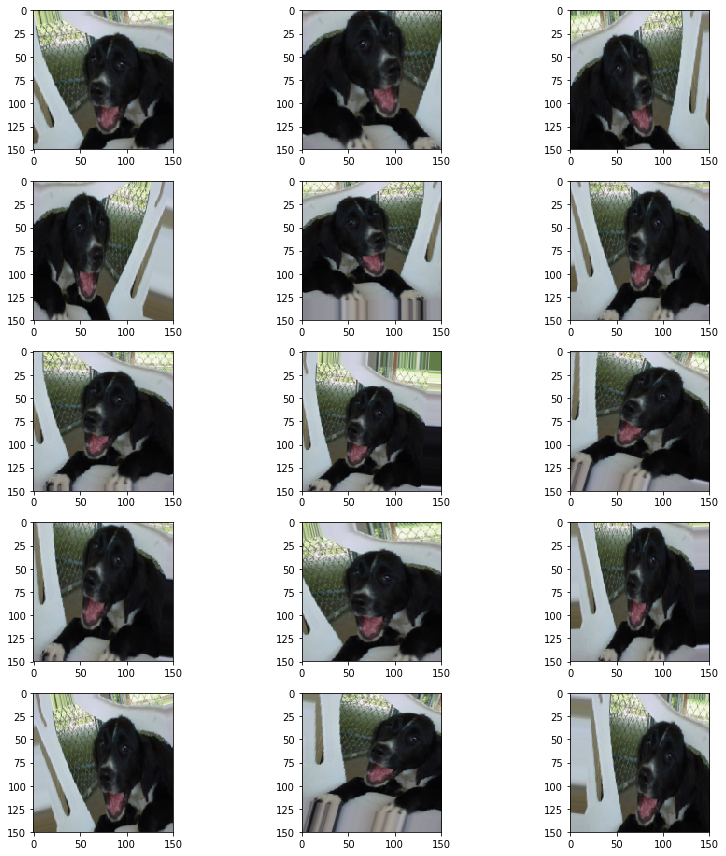

In [28]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [29]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=213,
)

W0814 12:21:05.613862 139870186358656 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
213/213 [==============================] - 26s 122ms/step - loss: 1.1653 - acc: 0.5502 - val_loss: 0.8620 - val_acc: 0.6113
Epoch 2/50
213/213 [==============================] - 21s 97ms/step - loss: 0.7972 - acc: 0.5987 - val_loss: 1.0420 - val_acc: 0.5153
Epoch 3/50
213/213 [==============================] - 21s 98ms/step - loss: 0.6796 - acc: 0.6324 - val_loss: 0.7511 - val_acc: 0.6031
Epoch 4/50
213/213 [==============================] - 21s 97ms/step - loss: 0.6366 - acc: 0.6706 - val_loss: 0.6402 - val_acc: 0.6438
Epoch 5/50
213/213 [==============================] - 21s 97ms/step - loss: 0.6220 - acc: 0.6787 - val_loss: 0.6723 - val_acc: 0.6501
Epoch 6/50
213/213 [==============================] - 20s 96ms/step - loss: 0.5880 - acc: 0.6965 - val_loss: 0.6161 - val_acc: 0.6845
Epoch 7/50
213/213 [==============================] - 20s 95ms/step - loss: 0.5673 - acc: 0.6987 - val_loss: 0.6378 - val_acc: 0.6718
Epoch 8/50
213/213 [==============================] - 21s 97m

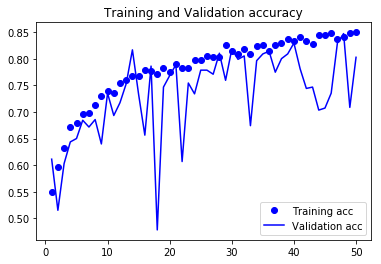

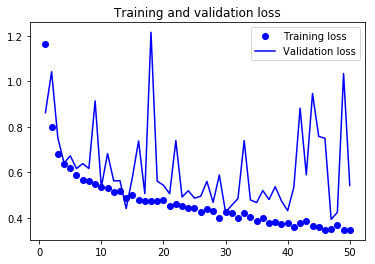

In [30]:
# Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

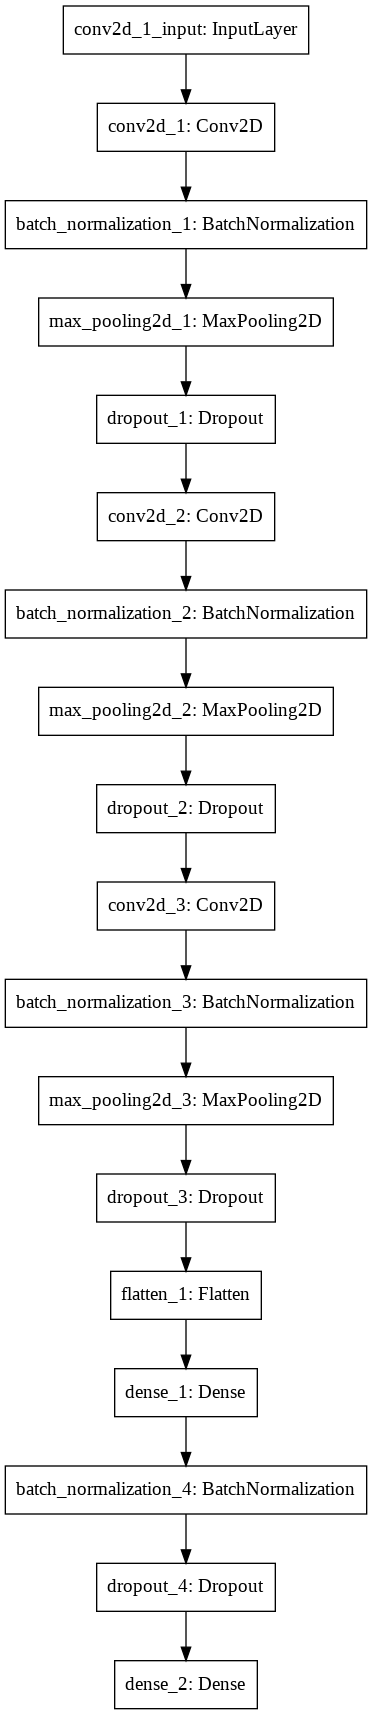

In [31]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file = './model.png')

In [0]:
# Save model
model.save_weights('model_1.h5')

### Prepare Testing Data

In [0]:
test_filenames = os.listdir('./kaggle_dogcat/test')
test_df = pd.DataFrame({
    'filename' : test_filenames
})
nb_samples = test_df.shape[0]

### Create Testing Generator

In [72]:
test_gen = ImageDataGenerator(rescale = 1/255)
test_generator = test_gen.flow_from_dataframe(
    test_df,
    './kaggle_dogcat/test/',
    x_col = 'filename',
    y_col = None,
    class_mode = None,
    target_size = IMAGE_SIZE,
    batch_size = batch_size,
    shuffle = False
)

Found 400 validated image filenames.


### Predict

In [0]:
predict = model.predict_generator(test_generator, steps = np.ceil(nb_samples/batch_size))

In [0]:
test_df['category'] = predict[:,1]

In [86]:
test_df.head()

,filename,category,id
0,249.jpg,0.046774,249.jpg
1,086.jpg,0.046015,086.jpg
2,367.jpg,0.984832,367.jpg
3,297.jpg,0.002431,297.jpg
4,250.jpg,0.392495,250.jpg


In [0]:
test_df2 = test_df.sort_values(by = ['filename'])

In [88]:
test_df2

,filename,category,id
346,000.jpg,0.949339,000.jpg
26,001.jpg,0.242706,001.jpg
273,002.jpg,0.003735,002.jpg
60,003.jpg,0.960824,003.jpg
15,004.jpg,0.013462,004.jpg
348,005.jpg,0.061914,005.jpg
354,006.jpg,0.215582,006.jpg
40,007.jpg,0.151138,007.jpg
59,008.jpg,0.000307,008.jpg
259,009.jpg,0.000851,009.jpg


In [0]:
submission_df = test_df2.copy()
submission_df['ID'] = submission_df['filename'].str.split('.').str[0]
submission_df['Predicted'] = submission_df['category']
submission_df.drop(['filename', 'category','id'], axis = 1, inplace = True)
submission_df.to_csv('submission5.csv', index = False)

In [90]:
pwd

'/content/drive/My Drive/code'

In [91]:
cd /content/drive/My Drive/code

/content/drive/My Drive/code


In [92]:
ls

D100/                    ml-marathon-final/         submission3.csv
dogs_and_cats_small.zip  ml-marathon-final_prever/  submission5.csv
kaggle_dogcat.zip        submission2.csv


In [0]:
cp /content/submission3.csv .